In [2]:
# Yolov5 custom model for face mask detection dataset

In [ ]:
# Installing yolov5 from ultarlytics repository and other required libraries

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)
%cd yolov5

import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
# Roboflow has been used to create the dataset and the link can be replaced for any dataset

In [ ]:
# Export code snippet and paste here
%cd /content
!curl -L "YOUR LINK HERE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat data.yaml

In [ ]:
# Model can be changed between differnt version of yolov5 such yolov5s,m,l,x by replacing the name  

In [ ]:
#this is the model configuration we will use for our tutorial 
%cat /content/yolov5/models/yolov5s.yaml

In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
# Layout of our custom model replacing the top layer with our nc

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml


In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance

In [ ]:

%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

In [ ]:
# Start tensorboard
# Launch after you have started training to check the training 
# logs save in the folder "runs"

In [ ]:

%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
# trained weights are saved by default in our weights folder

In [ ]:
%ls runs/

In [ ]:
# Location of the weights of the custo model obtained after training

In [ ]:
%ls runs/exp0_yolov5s_results/weights

In [ ]:
# use the best weights!
# Add more images to infernece folder for testing outside the test folder

In [ ]:
%cd /content/yolov5/
!python detect.py --weights runs/exp0_yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source ../test/images

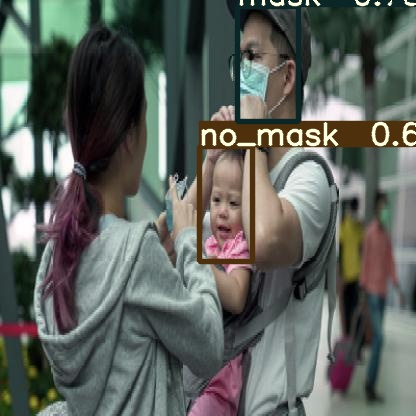

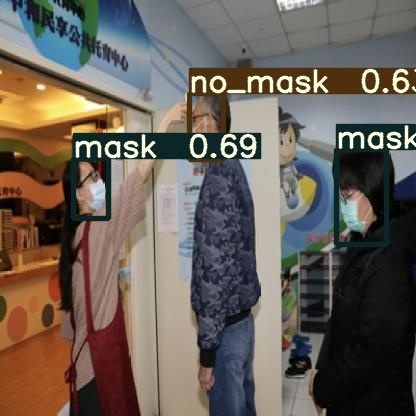

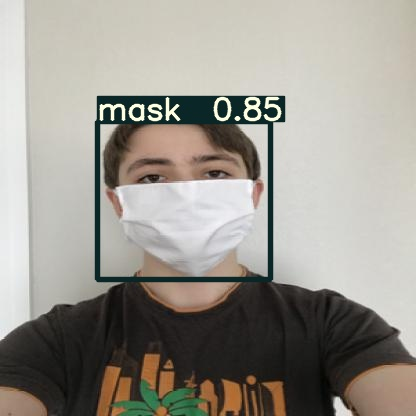

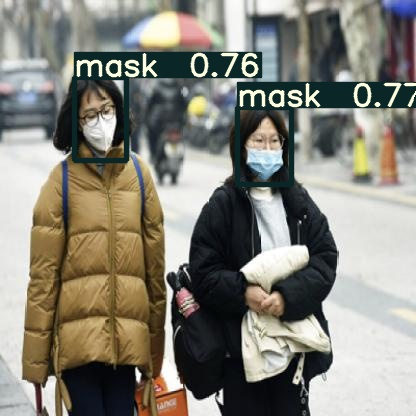

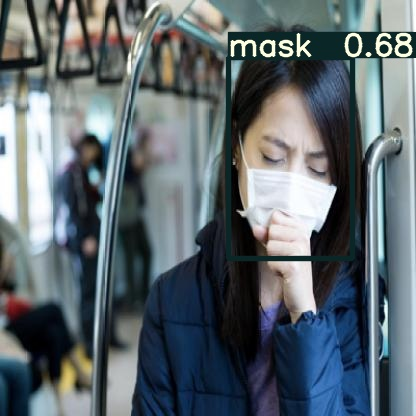

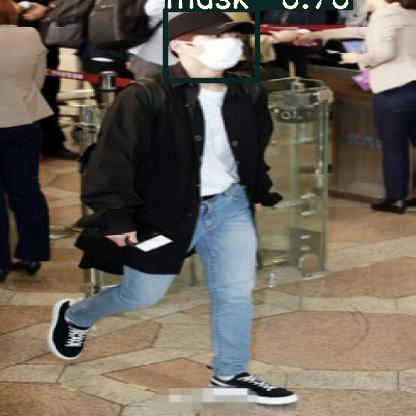

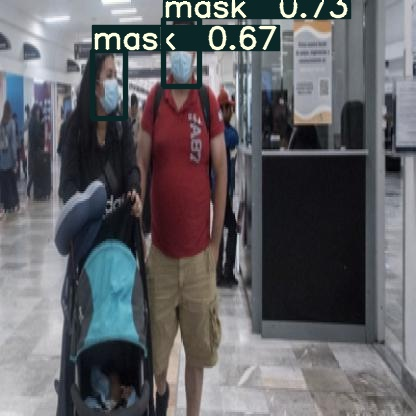

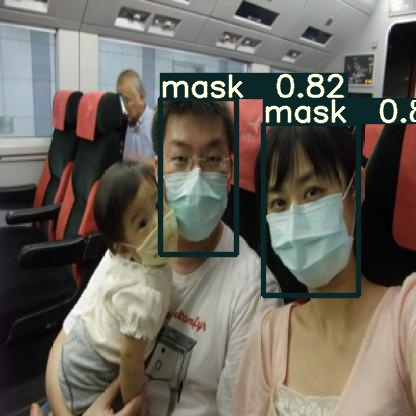

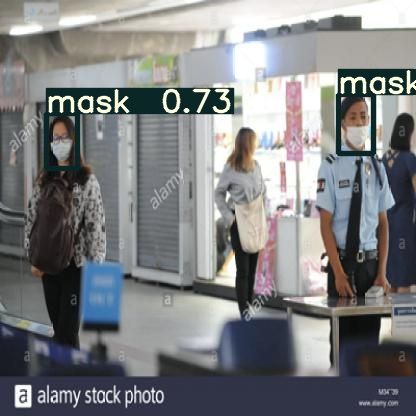

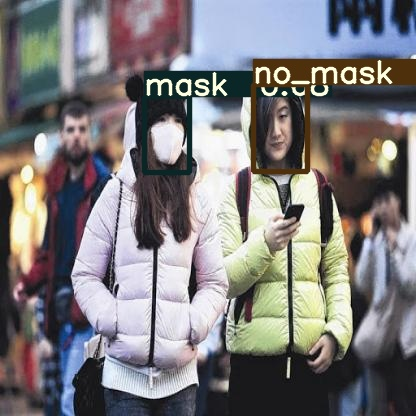

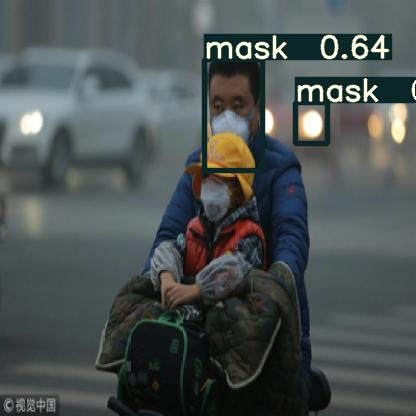

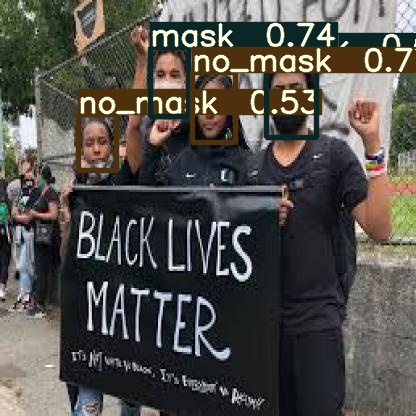

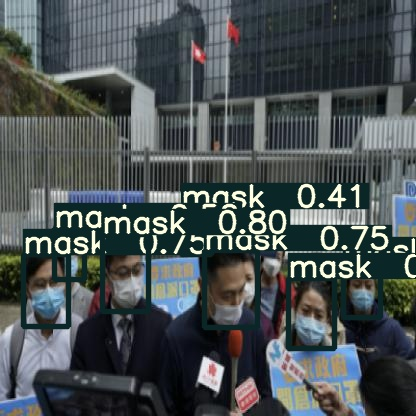

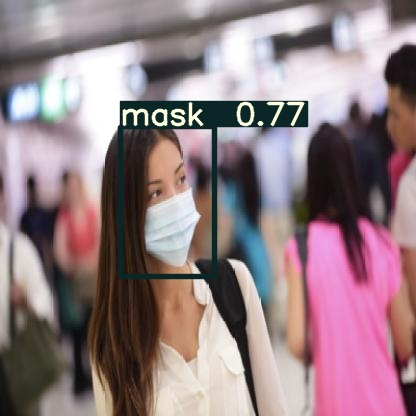

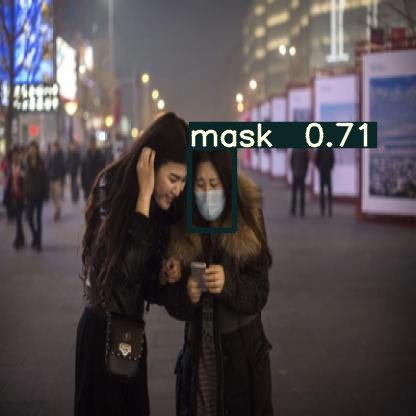

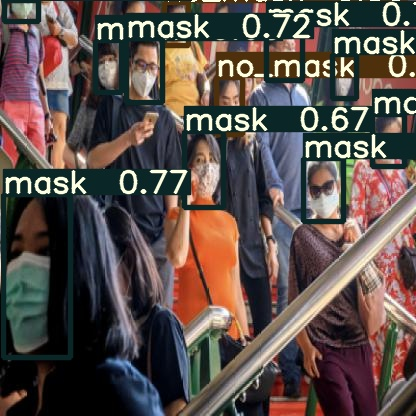

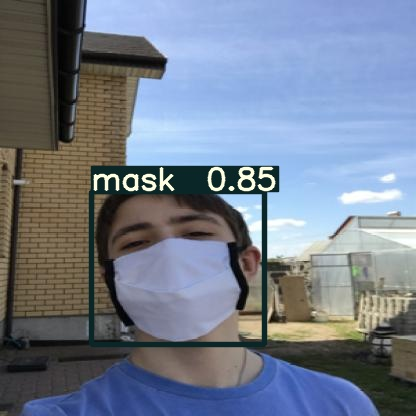

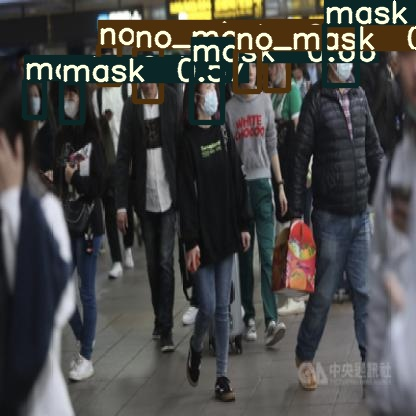

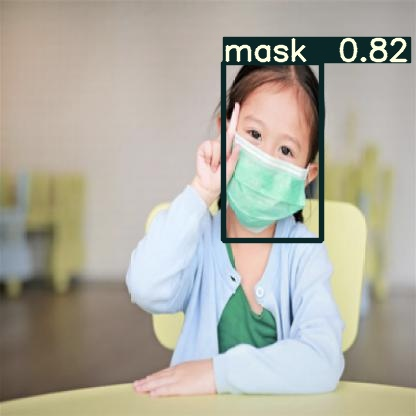

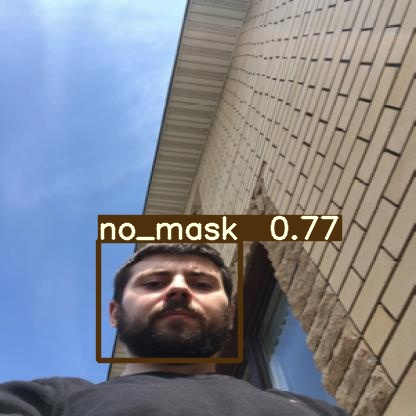

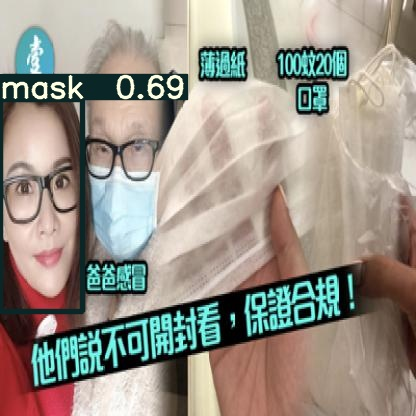

In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/inference/output/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Export Trained Weights for Future Inference

Now that you have trained your custom detector, you can export the trained weights you have made here for inference on your device elsewhere

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [ ]:
%cp /content/yolov5/runs/exp0_yolov5s_results/weights/best.pt /content/gdrive/My\ Drive

In [ ]:
# Upload video in the yolov5 folder to run the model on videos and run the following code to get predictions

In [ ]:
python detect.py --source video.avi

In [ ]:
# The video with prediction can be downloaded from the inference outputs folder